In [1]:
import pyspark
import os

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master('local').appName('myApp').config(conf=myConf).getOrCreate()

In [2]:
mydf = spark.read.option('charset','euc-kr').option('header','true').csv(os.path.join('../data','서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv'))

In [3]:
mydf = mydf.withColumnRenamed('대여일자','date')
mydf = mydf.withColumnRenamed('대여건수','count')

## 문제 1-1 : 년도별 대여건수 합계

In [5]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

getyear = udf(lambda x : '2018' if x[:4]=='2018' else '2019',StringType())
mydf = mydf.withColumn('year',getyear(mydf['date']))

In [10]:
mydf.groupby('year').agg({'count':'sum'}).show()

+----+-----------+
|year| sum(count)|
+----+-----------+
|2019|  1871935.0|
|2018|1.0124874E7|
+----+-----------+



## 문제 1-2 : 년도별, 월별 대여건수 합계 

In [14]:
getmonth = udf(lambda x : x[5:7],StringType())
mydf = mydf.withColumn('month',getmonth(mydf['date']))

In [17]:
mydf.groupby('year').pivot('month').agg({'count':'sum'}).show()

+----+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+--------+--------+
|year|      01|      02|      03|      04|      05|       06|       07|       08|       09|       10|      11|      12|
+----+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+--------+--------+
|2019|495573.0|471543.0|904819.0|    null|    null|     null|     null|     null|     null|     null|    null|    null|
|2018|164367.0|168741.0|462661.0|687885.0|965609.0|1207123.0|1100015.0|1037505.0|1447993.0|1420621.0|961532.0|500822.0|
+----+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+--------+--------+



## 문제 1-3 : 년도별, 월별 대여건수 그래프 

In [22]:
mypddf = mydf.groupby('year').pivot('month').agg({'count':'sum'}).toPandas()

In [24]:
mypddf.set_index('year',inplace=True)

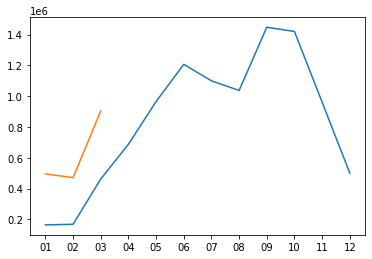

In [32]:
import matplotlib.pyplot as plt

plt.plot(mypddf.columns,mypddf.loc['2018'])
plt.plot(mypddf.columns,mypddf.loc['2019'])

plt.show()